In [1]:
import numpy as np              
import pandas as pd           
import seaborn as sns            
import matplotlib.pyplot as plt         


In [2]:
df = pd.read_csv("spam_new.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [3]:
df.iloc[:,0:2]

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
dfclean = df.iloc[:,0:2].rename(columns={"v1":"labels",
                                         "v2":"text_features"})

In [5]:
dfclean.head()

,labels,text_features
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
dfclean

,labels,text_features
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
dfclean["labels"].value_counts()

labels
ham     4825
spam     747
Name: count, dtype: int64

C:\Users\Owner\AppData\Local\Temp\ipykernel_23080\30806567.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dfclean["labels"],palette="viridis")


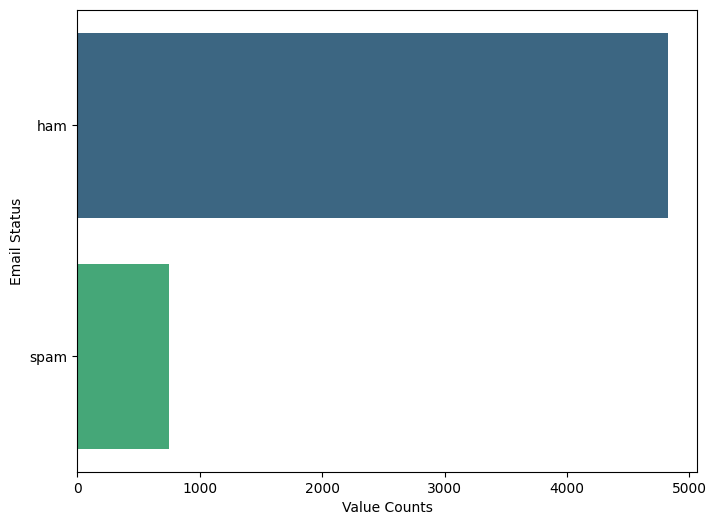

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(data=dfclean["labels"],palette="viridis")
plt.xlabel("Value Counts")
plt.ylabel("Email Status")
plt.show()

In [9]:
dfclean["labels"]

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: labels, Length: 5572, dtype: object

In [10]:
row1 = dfclean["text_features"][0]
print(row1)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


# PICKLE 🥒🥒❌

In [11]:
import transformers
import tqdm
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

c:\Users\Owner\facebook_marketplace\facebook_marketplace\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
len(row1)

111

In [13]:
dfclean["text_count"] = dfclean["text_features"].apply(len)

In [14]:
dfclean

,labels,text_features,text_count
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [15]:
from transformers import pipeline

c:\Users\Owner\facebook_marketplace\facebook_marketplace\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [16]:
ner = pipeline("ner", 
               model= "dslim/bert-base-NER")

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [17]:
ner(row1)

[{'entity': 'B-PER',
  'score': 0.68096477,
  'index': 29,
  'word': 'C',
  'start': 84,
  'end': 85}]

In [18]:
tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=5000,
    ngram_range=(1, 2),
    min_df=3
)

In [19]:
dfclean["text_features"]

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text_features, Length: 5572, dtype: object

In [20]:
X_tfidf = tfidf.fit_transform(dfclean["text_features"])


In [21]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_trans = encoder.fit_transform(dfclean["labels"])
print(y_trans)

[0 0 1 ... 0 0 0]


In [22]:
print(X_tfidf.shape)

(5572, 4616)


In [23]:
dfclean.shape

(5572, 3)

# Train Test Split 🥒🥒❌

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, 
                                                    y_trans,
                                                    test_size=0.2,
                                                    random_state=42, 
                                                    stratify=y_trans)


In [26]:
print(X_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(1115, 4616)
(4457, 4616)
(4457,)
(1115,)


In [27]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB


In [29]:
logistic = LogisticRegressionCV(cv=5,
                                random_state=42,
                                solver="lbfgs")

clf = logistic.fit(X_train, y_train)

c:\Users\Owner\facebook_marketplace\facebook_marketplace\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1780: FutureWarning: The default value for l1_ratios will change from None to (0.0,) in version 1.10. From version 1.10 onwards, only array-like with values in [0, 1] will be allowed, None will be forbidden. To avoid this warning, explicitly set a value, e.g. l1_ratios=(0,).
  warnings.warn(
c:\Users\Owner\facebook_marketplace\facebook_marketplace\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1823: FutureWarning: The fitted attributes of LogisticRegressionCV will be simplified in scikit-learn 1.10 to remove redundancy. Set`use_legacy_attributes=False` to enable the new behavior now, or set it to `True` to silence this warning during the transition period while keeping the deprecated behavior for the time being. The default value of use_legacy_attributes will change from True to False in scikit-learn 1.10. See the docstring of LogisticRegressionCV for more detai

In [30]:
y_predict = clf.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, precision_recall_curve, accuracy_score, precision_score, f1_score

In [40]:
precision_curve = precision_recall_curve(y_test, y_predict)
print(precision_curve)

(array([0.13363229, 0.98484848, 1.        ]), array([1.        , 0.87248322, 0.        ]), array([0, 1]))


In [38]:
f1 = f1_score(y_test, y_predict)
print(f1)

0.9252669039145908


In [37]:
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

0.9811659192825112


In [36]:
precision = precision_score(y_test, y_predict)
print(precision)

0.9848484848484849


In [34]:
clc_report = classification_report(y_test, y_predict)
print(clc_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



# Naive Bayes 🥒🥒❌

In [41]:
naive = MultinomialNB()

cln = naive.fit(X_tfidf, y_trans)

In [43]:
y_predict = clf.predict(X_test)
loss = classification_report(y_test, y_predict)

print(loss)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



# GridSearchcv 🥒🥒❌

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

param_grid = {
    "alpha": [0.001, 0.01, 0.1, 0.5, 1.0]
}

nb = MultinomialNB()

grid = GridSearchCV(
    nb,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

clgrid = grid.fit(X_train, y_train)

print("Best alpha:", grid.best_params_)
print("CV score:", grid.best_score_)


Best alpha: {'alpha': 0.1}
CV score: 0.9865365161329287


In [46]:
y_predict = clgrid.predict(X_test)
loss = classification_report(y_test, y_predict)

print(loss)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [ ]:
# {              precision    recall  f1-score   support

#            0       0.98      1.00      0.99       966
#            1       0.98      0.87      0.93       149}